In [113]:
#this is the function for the uniform descrete distribution.
runifdisc<-function(n, min, max) sample(min:max, n, replace=FALSE)


#This is the function for the markov chain for the regular coupon collector problem
Coupon <- function(x) {
    collection1 = c()
    collection2 = c()
    count = 0
    while (length(collection1) < x) {
        booster = runifdisc(1,1,x)
        count = count + 1
        if (!(booster %in% collection1)) {
            collection1 = append(collection1, booster)
        }
        collection2 = append(collection2, booster)    
    }
    length(collection1)
    length(collection2)
}



#This is the function for the markov chain for the batch coupon collector problem
Coupon_batch <- function(x, y) {
    collection1 = c()
    collection2 = c()
    count = 0
    while (length(collection1) < x) {
        booster = runifdisc(y, 1, x)
        count = count + 1
        for (i in 1:length(booster)) {  
            if (!(booster[i] %in% collection1)) {
                collection1 = append(collection1, booster[i])
            }
        }
        collection2 = append(collection2, booster)    
    }
    length(collection1)
    length(collection2)
    count
}

#This is the function for the markov chain for the weighted batch coupon collector problem
Coupon_weightedbatch <- function() {
    common = seq(1,121)
    uncommon = seq(122,242)
    rare = seq(243,363)
    land = seq(364,383)
    collection1 = c()
    collection2 = c()
    count = 0
    while (length(collection1) < 383) {
        common_pack = sample(common, 10, replace = FALSE)
        uncommon_pack = sample(uncommon, 3, replace = FALSE)
        rare_pack = sample(rare, 1, replace = FALSE)
        land_pack = sample(land, 1, replace = FALSE)
        booster = c(common_pack, uncommon_pack, rare_pack, land_pack)
        count = count + 1
        for (i in 1:length(booster)) {  
            if (!(booster[i] %in% collection1)) {
                collection1 = append(collection1, booster[i])
            }
        }
        collection2 = append(collection2, booster)    
    }
    length(collection1)
    length(collection2)
    count
}

In [114]:
#this is the loop that samples the markov process for the coupon collectors problem and reads it into a vector for n = 1 to 500
y = c()
for (i in 1:500){
    x = replicate(100, Coupon(i))
    y[[i]] = x
}

[1] 2561.33

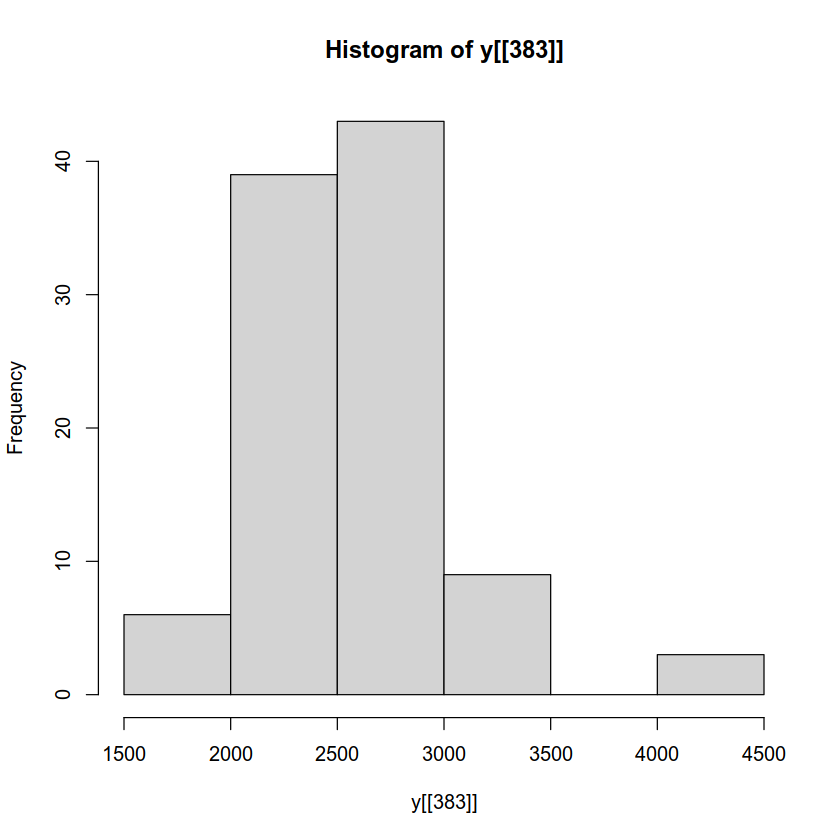

In [115]:
#creates a histrogram for n = 383 and finds the mean of 100 samples for n = 383
hist(y[[383]])
mean(y[[383]])

In [116]:
#this is the analytic solution for the Coupon Collectors problem with n = 383
i = seq(1,383)
383*(sum(1/i))

[1] 2499.671

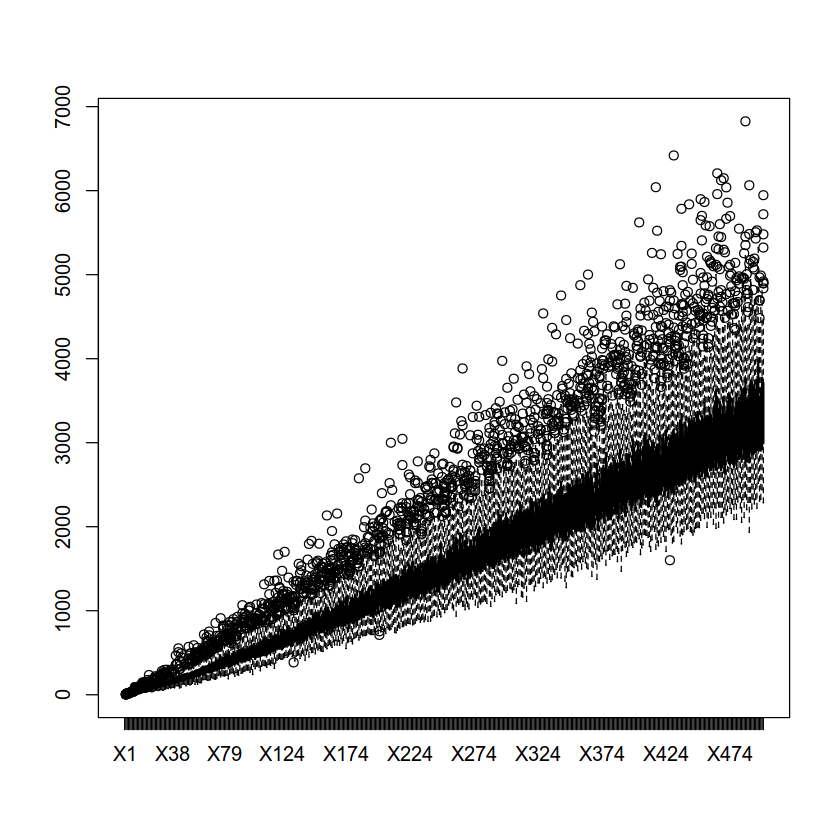

In [117]:
#this creates a plot of box plots of the coupon problem
m = matrix(0, ncol = 500, nrow = 100)
ex_df = data.frame(m)
for (i in 1:500) {
    ex_df[,i] = y[i] 
}

boxplot(ex_df)

In [119]:
#this is the loop that samples the markov process for the batch coupon collectors problem and reads it into a vector for n = 1 to 500
w = c()
for (i in 15:500){
    v = replicate(100, Coupon_batch(i, 15))
    w[[i]] = v
}

[1] 158.84

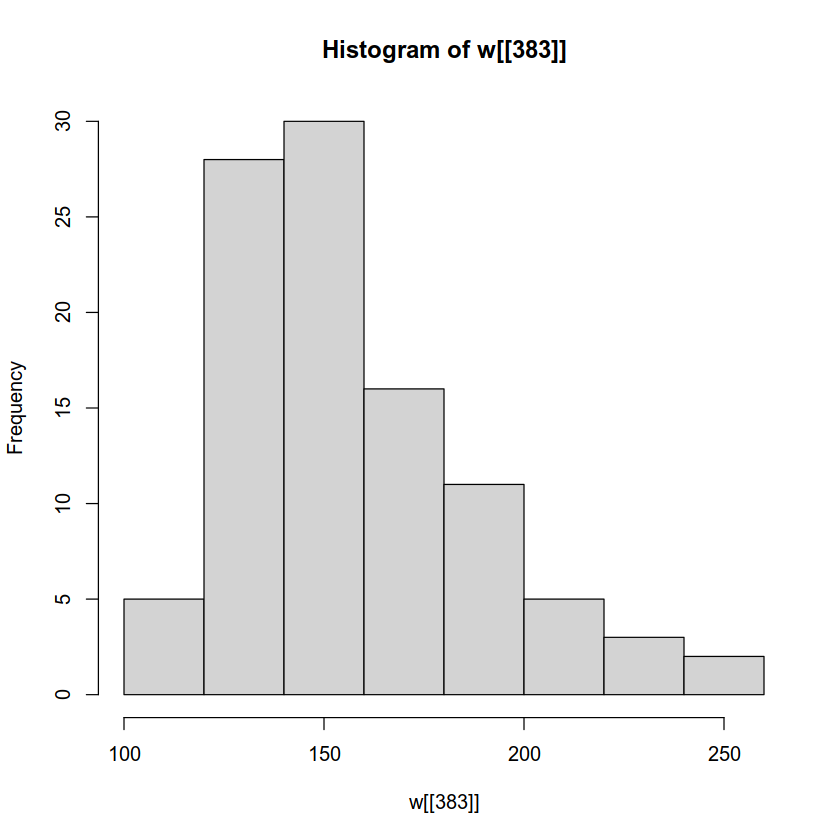

In [120]:
#creates a histrogram for n = 383, m = 15 and finds the mean of 100 samples for n = 383, m = 15
hist(w[[383]])
mean(w[[383]])

[1] 9.02

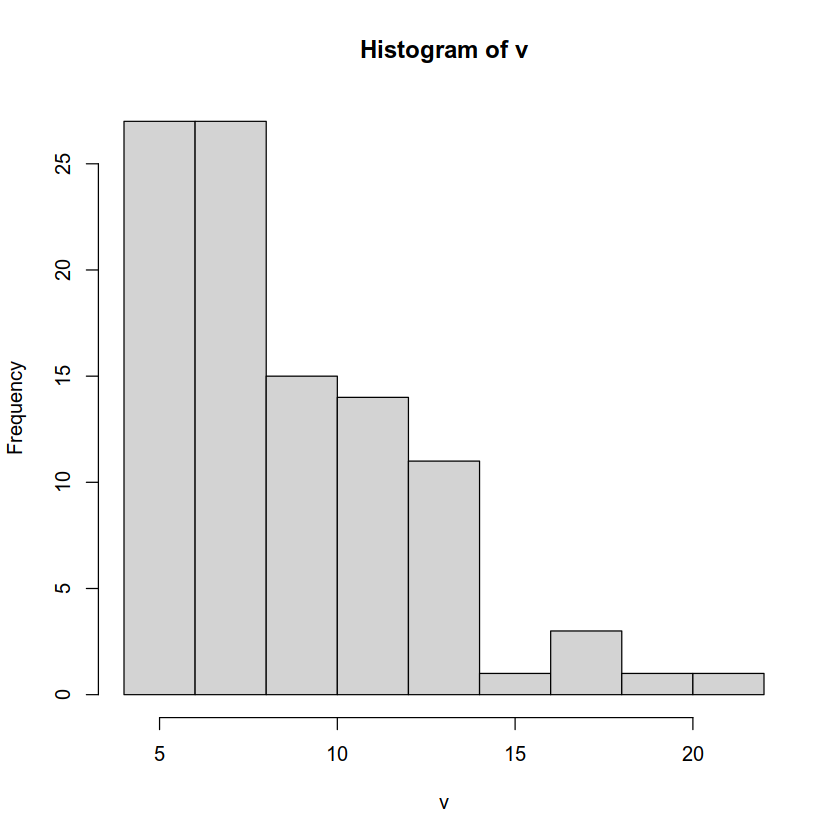

In [121]:
#creates a histrogram for n = 10, m = 3 and finds the mean of 100 samples for n = 10, m = 3
v = replicate(100, Coupon_batch(10, 3))
hist(v)
mean(v)

In [122]:
#this is the analytic solution for the batch Coupon Collectors problem with n = 10, m = 3
total = c()
add = 0
m = 3
n = 10


for (s in 1:n) {
    n_m = choose(n, m)
    p = n - s
    ns_m = choose(p, m)
    n_s = choose(n, s)
    sign = (-1)^(s+1)
    sum = (sign*n_s)/((n_m - ns_m))
    add = add + sum
    total = c(total, sum)
    #print()
}

sum(total)
add
add*n_m
sum(total)*n_m

[1] 0.07538511

[1] 0.07538511

[1] 9.046213

[1] 9.046213

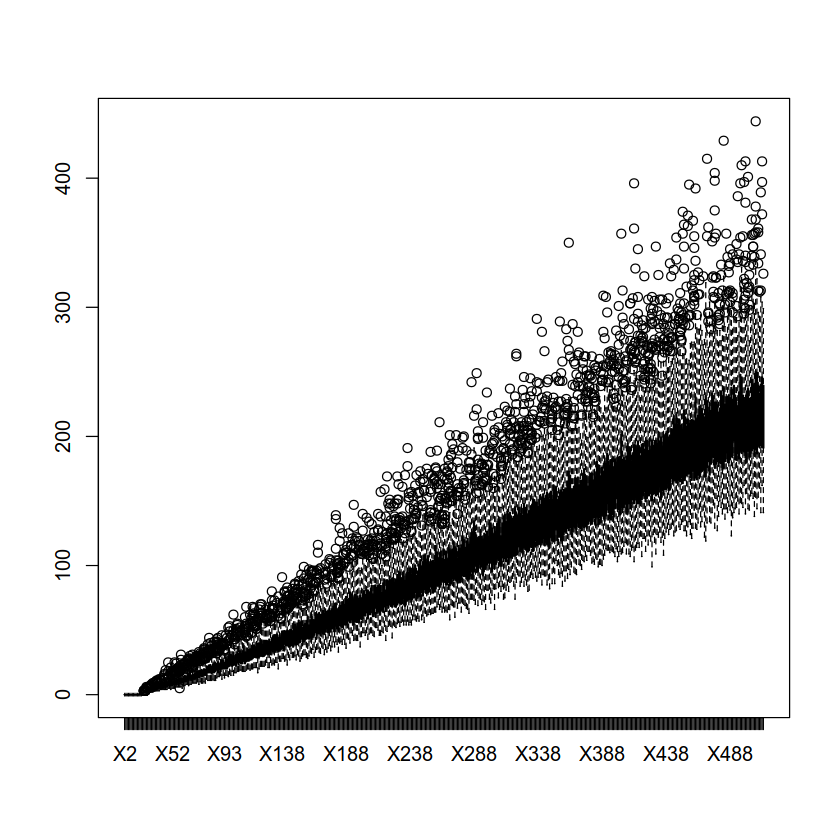

In [123]:
#this creates a plot of box plots of the batch coupon problem
m = matrix(0, ncol = 500, nrow = 100)
exb_df = data.frame(m)
for (i in 1:500) {
    exb_df[,i] = w[i] 
}    

boxplot(exb_df)

[1] 675.14

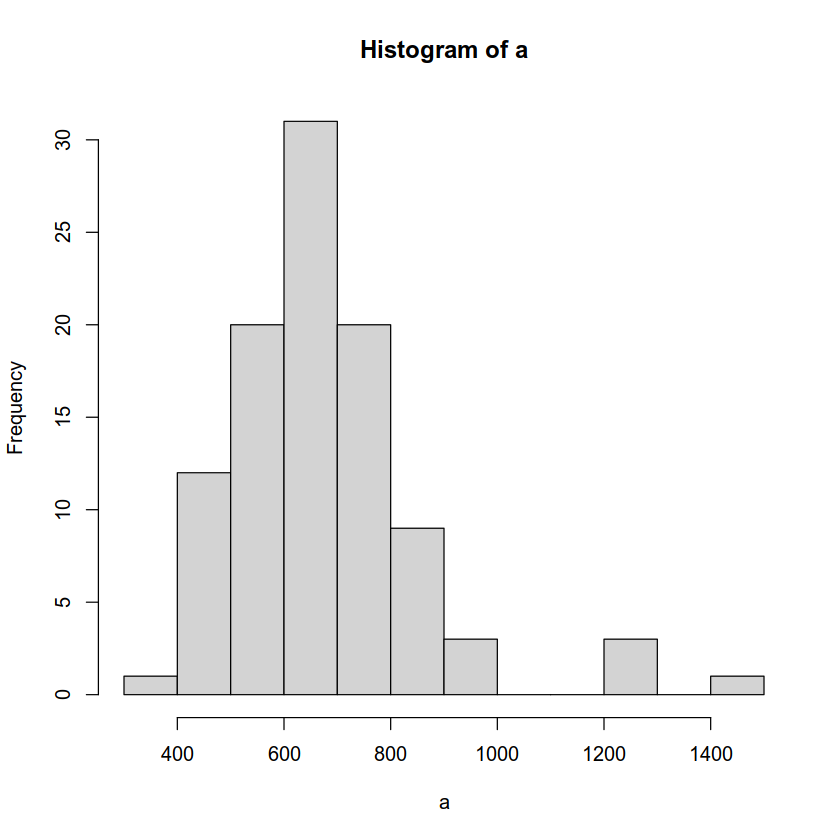

In [124]:
#creates a histrogram for n = 383, m = 15 and finds the mean of 100 samples for n = 383, m = 15
#for the batch weighted coupon problem
a = replicate(100, Coupon_weightedbatch())
hist(a)
mean(a)